In [1]:
import pandas as pd
import numpy as np
import math
import operator
from collections import Counter
from matplotlib import pyplot as plt

from sklearn.metrics import accuracy_score  
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('2darray.csv',encoding = 'unicode_escape')

In [3]:
X = df.iloc[:,0:1001].values

In [4]:
y = df.iloc[:,-1].values

In [5]:
y

array([2, 3, 1, ..., 1, 2, 3], dtype=int64)

In [6]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [7]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [8]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=10)  
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [9]:
y_pred = classifier.predict(X_test)

In [10]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[63  0  0  0  0]
 [ 0 59  0  0  0]
 [ 0  0 64  0  0]
 [ 0  0  0 23  0]
 [ 0  0  0  1  0]]
             precision    recall  f1-score   support

          1       1.00      1.00      1.00        63
          2       1.00      1.00      1.00        59
          3       1.00      1.00      1.00        64
          4       0.96      1.00      0.98        23
          5       0.00      0.00      0.00         1

avg / total       0.99      1.00      0.99       210



C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [11]:
acc=classifier.score(X_train, y_train)

In [12]:
acc

0.9964200477326969

In [13]:
from sklearn.externals import joblib

In [14]:
joblib.dump(classifier, 'filename.pkl')

['filename.pkl']

In [15]:
knn_from_joblib = joblib.load('filename.pkl') 

In [16]:
knn_from_joblib.predict(X_test)

array([1, 2, 3, 2, 2, 3, 3, 4, 3, 3, 1, 1, 1, 4, 1, 4, 1, 1, 4, 3, 3, 1,
       2, 1, 2, 3, 1, 3, 3, 1, 3, 4, 1, 1, 2, 2, 4, 3, 3, 4, 2, 1, 1, 2,
       2, 4, 1, 1, 1, 2, 1, 3, 3, 3, 1, 3, 3, 3, 4, 2, 2, 1, 1, 1, 4, 1,
       3, 1, 3, 1, 2, 1, 3, 3, 2, 4, 1, 2, 2, 2, 2, 3, 1, 3, 2, 4, 2, 3,
       3, 3, 2, 1, 1, 4, 3, 1, 3, 2, 2, 1, 2, 1, 1, 2, 2, 1, 3, 3, 3, 3,
       3, 2, 2, 1, 2, 2, 1, 3, 1, 4, 1, 1, 2, 2, 3, 2, 1, 1, 1, 3, 2, 2,
       2, 3, 3, 2, 3, 1, 3, 1, 4, 4, 2, 1, 2, 1, 4, 3, 3, 2, 2, 2, 3, 1,
       1, 4, 2, 3, 1, 4, 3, 2, 3, 1, 4, 2, 3, 3, 1, 1, 1, 2, 3, 4, 3, 2,
       3, 2, 1, 1, 3, 1, 3, 1, 2, 1, 3, 2, 3, 4, 3, 2, 2, 2, 3, 1, 4, 3,
       3, 2, 1, 2, 2, 3, 3, 4, 3, 2, 1, 2], dtype=int64)

In [17]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0,0.5,'Mean Error')

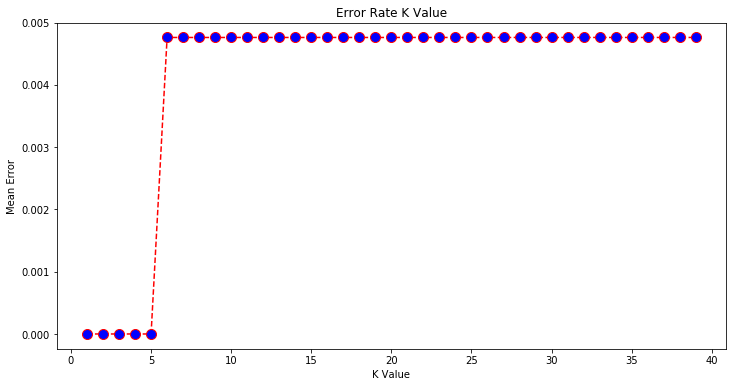

In [18]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')